<a href="https://colab.research.google.com/github/BrMrtn/GoogleColab/blob/main/K%C3%A9pfeldolgoz%C3%A1s/khf1_3_Tatcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Könyvtárak importálása

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

képek letölétése

In [2]:
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/Lawrence.png
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/Reynolds.png

--2024-11-05 14:32:05--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/Lawrence.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 356192 (348K) [image/png]
Saving to: ‘Lawrence.png’

Lawrence.png        100%[===================>] 347.84K  --.-KB/s    in 0.05s   

2024-11-05 14:32:05 (6.21 MB/s) - ‘Lawrence.png’ saved [356192/356192]

--2024-11-05 14:32:05--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/Reynolds.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 421952 (412K) [image/p

In [3]:
# Haar kaszkádolók betöltése
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

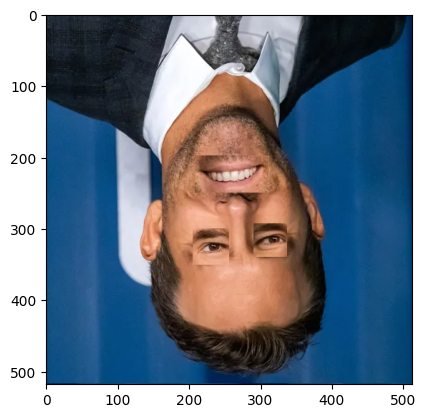

In [18]:
# Kép betöltése
img = cv2.imread("Reynolds.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect eyes
eyes = eye_cascade.detectMultiScale(img, 1.1, 10)
eye_regions = []
for (ex, ey, ew, eh) in eyes[:2]:  # Limit to first two detected eyes
    eye_region = img[ey:ey+eh, ex:ex+ew]
    eye_regions.append((ex, ey, ew, eh, eye_region))

# Rotate each eye region
for (ex, ey, ew, eh, eye_region) in eye_regions:
    rotated_eye = cv2.rotate(eye_region, cv2.ROTATE_180)
    img[ey:ey+eh, ex:ex+ew] = rotated_eye

# Detect mouth (using smile classifier as a proxy)
mouths = mouth_cascade.detectMultiScale(img, 1.7, 22)
if len(mouths) > 0:
    (mx, my, mw, mh) = mouths[0]  # Take the first detected mouth
    mouth_region = img[my:my+mh, mx:mx+mw]

    # Rotate mouth region
    rotated_mouth = cv2.rotate(mouth_region, cv2.ROTATE_180)
    img[my:my+mh, mx:mx+mw] = rotated_mouth

# Rotate the entire image by 180 degrees
thatcher_image = cv2.rotate(img, cv2.ROTATE_180)

# Save and display the result
plt.imshow(thatcher_image)